In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import random
import copy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from IPython.display import *
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('games_2.csv', sep = ',')
print(df.shape,df.columns, sep='\n')
#загрузил данные, посморел размерность, какие колонки

(6519, 23)
Index(['Название', 'цена', 'конечная_цена', 'скидка', 'Мультиплеер',
       'Одиночный', 'Кооператив', 'ММО', 'Русский', 'Англикий',
       'количество_языков', 'недавние_оценки+', 'все_оценки',
       'позитивная_оценка', 'негативная_оценка', 'жанр', 'дата_релиза',
       'Издатель', 'ОС', 'Процессор', 'Оперативная память', 'Видеокарта',
       'Место на диске'],
      dtype='object')


In [6]:
df.head(5) # посмотрим на первые 5 элементов таблицы

,Название,цена,конечная_цена,скидка,Мультиплеер,Одиночный,Кооператив,ММО,Русский,Англикий,...,позитивная_оценка,негативная_оценка,жанр,дата_релиза,Издатель,ОС,Процессор,Оперативная память,Видеокарта,Место на диске
0,MORDHAU,289.0,289.0,0.0,0,0.0,0.0,0.0,1.0,1.0,...,2027.0,564.0,Экшены,2019-04-29,Triternion,"Windows 7 64 Bit, Windows 8 64 Bit, Windows 10...",Intel Core i5 - 6600k or AMD equivalent,16 GB ОЗУ,NVIDIA GTX 1060 or AMD equivalent,20 GB
1,UBOAT,515.0,437.0,15.0,0,1.0,0.0,0.0,1.0,1.0,...,353.0,91.0,Экшены,2019-04-30,PlayWay S.A.,Windows 7 64 Bit / Windows 8 64 Bit / Windows ...,Intel Quad Core i7 3770K or AMD Ryzen 5 1600X,8 GB ОЗУ,"GeForce GTX 1060 6 GB (1080p High), GeForce GT...",20 GB
2,Mortal Kombat 11,1190.0,1190.0,0.0,1,1.0,0.0,0.0,1.0,1.0,...,4140.0,3212.0,Экшены,2019-04-23,QLOC,64-bit Windows 7 / Windows 10,"Intel Core i5-2300, 2.8 GHz / AMD FX-6300, 3.5...",8 GB ОЗУ,NVIDIA® GeForce™ GTX 780 or NVIDIA® GeForce™ G...,NaN
3,MONSTER HUNTER: WORLD,5249.0,5249.0,0.0,1,1.0,1.0,0.0,1.0,1.0,...,72212.0,35301.0,Экшены,2018-08-09,"CAPCOM Co., Ltd.","WINDOWS® 7, 8, 8.1, 10 (требуется 64-разрядная)","Intel® Core™ i7 3770 3,4 ГГц или Intel® Core™ ...",8 GB ОЗУ,NVIDIA® GeForce® GTX 1060 (видеопамять 3 ГБ) и...,30 GB
4,PLAYERUNKNOWN'S BATTLEGROUNDS,949.0,949.0,0.0,1,0.0,0.0,0.0,1.0,1.0,...,496482.0,487350.0,Экшены,2017-12-21,PUBG Corporation,"64-bit Windows 7, Windows 8.1, Windows 10",Intel Core i5-6600K / AMD Ryzen 5 1600,16 GB ОЗУ,NVIDIA GeForce GTX 1060 3GB / AMD Radeon RX 58...,30 GB


In [ ]:
#лично скачивал "лидеры продаж" с сайта стима(steam)

In [215]:
df['data_релиза']=pd.to_datetime(df['дата_релиза'],format='%Y-%m-%d')

In [9]:
df.describe()# посмотрим основные характериситики числовых данных. не увидел мультиплеер,

,цена,конечная_цена,скидка,Одиночный,Кооператив,ММО,Русский,Англикий,количество_языков,недавние_оценки+,все_оценки,позитивная_оценка,негативная_оценка
count,6473.000000,6473.000000,6474.000000,6519.000000,6519.000000,6519.000000,6519.0,6519.000000,6519.000000,5063.000000,6124.000000,6124.000000,6124.000000
mean,346.547814,305.252897,14.223973,0.880350,0.139285,0.021169,1.0,0.990643,6.813468,194.491606,3889.951502,3313.277106,576.674396
std,745.416804,709.885738,25.196050,0.324577,0.346270,0.143958,0.0,0.096287,5.199358,499.453079,20221.653148,15170.031276,6834.456630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000
25%,85.000000,65.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,2.000000,23.000000,25.000000,19.000000,4.000000
50%,199.000000,154.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,6.000000,53.000000,159.000000,121.500000,28.000000
75%,419.000000,360.000000,21.000000,1.000000,0.000000,0.000000,1.0,1.000000,9.000000,180.000000,1364.000000,1113.250000,195.000000
max,39355.000000,39355.000000,90.000000,1.000000,1.000000,1.000000,1.0,1.000000,29.000000,17105.000000,983832.000000,496482.000000,487350.000000


In [50]:
df.describe(include=['object'])[['жанр', 'Издатель', 'ОС', 'Оперативная память', 'Видеокарта','Место на диске']]

,жанр,Издатель,ОС,Оперативная память,Видеокарта,Место на диске
count,6321,6073,5541,5358,5087,4738
unique,41,1854,1286,136,2196,273
top,Экшены,Paradox Interactive,Windows 10,8 GB ОЗУ,NVIDIA GeForce GTX 960 or comparable,2 GB
freq,2740,214,415,1363,48,380


In [25]:
df['Мультиплеер']=(df['Мультиплеер']=='1').astype(float) #преобразовал в нужны формат

In [27]:
df.describe()['Мультиплеер']# посмотри теперь на мультиплеер

count    6519.000000
mean        0.297285
std         0.457098
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Мультиплеер, dtype: float64

In [26]:
df.info()# здесь посмотри сколько данных не NaN и какого типа данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 23 columns):
Название              6519 non-null object
цена                  6473 non-null float64
конечная_цена         6473 non-null float64
скидка                6474 non-null float64
Мультиплеер           6519 non-null float64
Одиночный             6519 non-null float64
Кооператив            6519 non-null float64
ММО                   6519 non-null float64
Русский               6519 non-null float64
Англикий              6519 non-null float64
количество_языков     6519 non-null float64
недавние_оценки+      5063 non-null float64
все_оценки            6124 non-null float64
позитивная_оценка     6124 non-null float64
негативная_оценка     6124 non-null float64
жанр                  6321 non-null object
дата_релиза           6486 non-null object
Издатель              6073 non-null object
ОС                    5541 non-null object
Процессор             5446 non-null object
Оперативная память 

In [53]:
(df.sort_values(by='цена', ascending=False))[['Название','цена','скидка','конечная_цена', 'жанр','Издатель']].head(20)
# посмотрим самые дорогие игры

,Название,цена,скидка,конечная_цена,жанр,Издатель
168,RPG Maker MV,39355.0,0.0,39355.0,Дизайн и иллюстрация,Yoji Ojima
1125,RPG Maker VX Ace,19013.0,0.0,19013.0,Дизайн и иллюстрация,Degica
2109,VEGAS Pro 15 Edit Steam Edition,17999.0,75.0,4499.0,Работа со звуком,MAGIX Software GmbH
1188,Street Fighter V,15646.0,0.0,15646.0,Экшены,Capcom
2405,Visual Novel Maker,10850.0,0.0,10850.0,Веб-разработка,Degica
4346,Groove Coaster,5309.0,0.0,5309.0,Экшены,Degica
3,MONSTER HUNTER: WORLD,5249.0,0.0,5249.0,Экшены,"CAPCOM Co., Ltd."
1733,EVE Online: 12 Months Omega Time,4899.0,0.0,4899.0,Экшены,CCP
1318,BLUE REFLECTION / BLUE REFLECTION 幻に舞う少女の剣,4192.0,0.0,4192.0,Ролевые игры,"KOEI TECMO GAMES CO., LTD."
1412,FURIDASHI: Drift Cyber Sport,4027.0,0.0,4027.0,NaN,Drift Physics Crew


In [54]:
(df.sort_values(by='скидка', ascending=False))[['Название','цена','скидка','конечная_цена', 'жанр','Издатель']].head(20)
#посмотри игры с максимальной скидкой.

,Название,цена,скидка,конечная_цена,жанр,Издатель
6142,Hyper Sentinel,360.0,90.0,36.0,Экшены,Huey Games
6212,Hentai beautiful girls 2 - Wallpapers,289.0,90.0,28.0,Казуальные игры,Laush Studio
3176,Avencast: Rise of the Mage,249.0,90.0,24.0,Экшены,Meridian4
2609,Mahjong Pretty Girls Battle,349.0,90.0,34.0,Казуальные игры,Zoo Corporation
4735,Beautiful Japanese Scenery - Animated Jigsaws,249.0,90.0,24.0,Казуальные игры,BottleCube inc.
6140,FukTopia,360.0,90.0,36.0,Экшены,FreeMinds
2902,Mystery Chronicle: One Way Heroics,249.0,90.0,24.0,Ролевые игры,"Spike Chunsoft Co., Ltd."
3047,Opaline,154.0,90.0,15.0,Приключенческие игры,Aldorlea Games
6335,Worst Case Z,289.0,90.0,28.0,Экшены,BME Digital Studios
5853,Shooting Stars!,199.0,90.0,19.0,Экшены,Daedalic Entertainment


In [ ]:
#замечены дубликаты, надо удалить дубликаты по названиям.

In [56]:
df.drop_duplicates(subset='Название', keep="last", inplace=True)

In [57]:
df.shape

(5553, 23)

In [47]:
#цель: узнать какие игры получают большую скидку. попытаться узнать от чего зависит размер скидки.

In [58]:
#необходимо преобразовать место на диске и опер. память в формат float

In [98]:
for j,i in enumerate(df['Оперативная память']):
    if type(i)==type("") and len(i.split())>1 and i.split()[0].isdigit():
        if i.split()[1]=='GB' or i.split()[1]=='ГБ':
            df['Оперативная память'].iloc[j]=int(i.split()[0])*1024
        else:
            df['Оперативная память'].iloc[j]=int(i.split()[0])
    else:
        df['Оперативная память'].iloc[j]=np.nan
    print(f"\r{j}",end='',flush=True)

5552

In [103]:
for j,i in enumerate(df['Место на диске']):
    if type(i)==type("") and len(i.split())>1 and i.split()[0].isdigit():
        if i.split()[1]=='GB' or i.split()[1]=='ГБ':
            df['Место на диске'].iloc[j]=int(i.split()[0])*1024
        else:
            df['Место на диске'].iloc[j]=int(i.split()[0])
    else:
        df['Место на диске'].iloc[j]=np.nan
    print(f"\r{j}",end='',flush=True)

1

C:\Users\vkrin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


5552

In [121]:
(df['Оперативная память'])=df['Оперативная память'].astype(float)

In [119]:
df['Место на диске']=df['Место на диске'].astype(float)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 0 to 6518
Data columns (total 23 columns):
Название              5553 non-null object
цена                  5550 non-null float64
конечная_цена         5550 non-null float64
скидка                5551 non-null float64
Мультиплеер           5553 non-null float64
Одиночный             5553 non-null float64
Кооператив            5553 non-null float64
ММО                   5553 non-null float64
Русский               5553 non-null float64
Англикий              5553 non-null float64
количество_языков     5553 non-null float64
недавние_оценки+      4256 non-null float64
все_оценки            5251 non-null float64
позитивная_оценка     5251 non-null float64
негативная_оценка     5251 non-null float64
жанр                  5358 non-null object
дата_релиза           5524 non-null object
Издатель              5170 non-null object
ОС                    4674 non-null object
Процессор             4581 non-null object
Оперативная память 

In [133]:
df.groupby(by='жанр').mean().tail(15)

,цена,конечная_цена,скидка,Мультиплеер,Одиночный,Кооператив,ММО,Русский,Англикий,количество_языков,недавние_оценки+,все_оценки,позитивная_оценка,негативная_оценка,Оперативная память,Место на диске
жанр,,,,,,,,,,,,,,,,
Бухгалтерия,259.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,3.000000,10.000000,60.000000,41.000000,19.000000,NaN,NaN
Веб-разработка,2576.400000,2261.000000,61.000000,0.000000,0.200000,0.000000,0.000000,1.0,1.000000,2.400000,112.750000,124.200000,103.200000,21.000000,1621.333333,1224.000000
Гонки,351.520000,327.946667,13.000000,0.586667,0.920000,0.026667,0.000000,1.0,1.000000,8.160000,223.444444,1886.971429,1569.085714,317.885714,7563.636364,22533.333333
Дизайн и иллюстрация,1159.864865,981.986486,53.810811,0.000000,0.040541,0.000000,0.000000,1.0,1.000000,8.324324,210.388889,139.827586,123.000000,16.827586,971.897436,650.666667
Инди,238.797732,225.446125,7.332703,0.224953,0.945180,0.083176,0.005671,1.0,0.990548,7.508507,207.531049,3289.531670,3033.320537,256.211132,6434.384824,2796.589806
Казуальные игры,150.616977,123.273292,20.188406,0.130435,0.962733,0.039337,0.002070,1.0,0.977226,6.542443,130.860182,924.893665,840.653846,84.239819,2200.244332,910.844612
Многопользовательские игры,521.461538,521.461538,0.000000,0.461538,0.461538,0.000000,0.538462,1.0,1.000000,2.461538,147.428571,4135.916667,3119.000000,1016.916667,7448.000000,25127.384615
Приключенческие игры,248.870670,206.607390,16.952656,0.050808,0.921478,0.028868,0.000000,1.0,0.964203,5.525404,152.113181,1732.521998,1560.463734,172.058264,7351.756677,8188.024148
Работа со звуком,2896.375000,1029.125000,25.000000,0.000000,0.250000,0.000000,0.000000,1.0,1.000000,8.375000,96.000000,493.857143,396.142857,97.714286,5324.800000,395.333333


In [ ]:
#обработка данных завершена

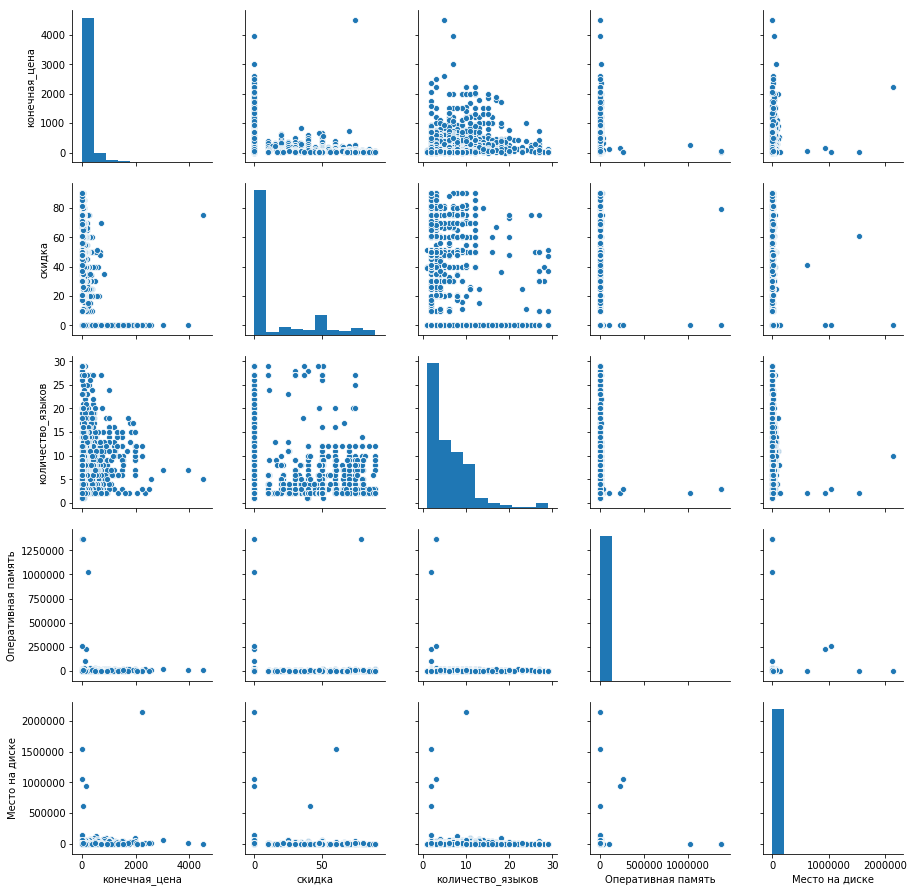

In [136]:
cols = ['конечная_цена',  'скидка',
       'количество_языков', 'Оперативная память','Место на диске','дата_релиза']
sns_plot = sns.pairplot(df[cols].dropna())
#по графикам видно, что есть какие-то выбросы

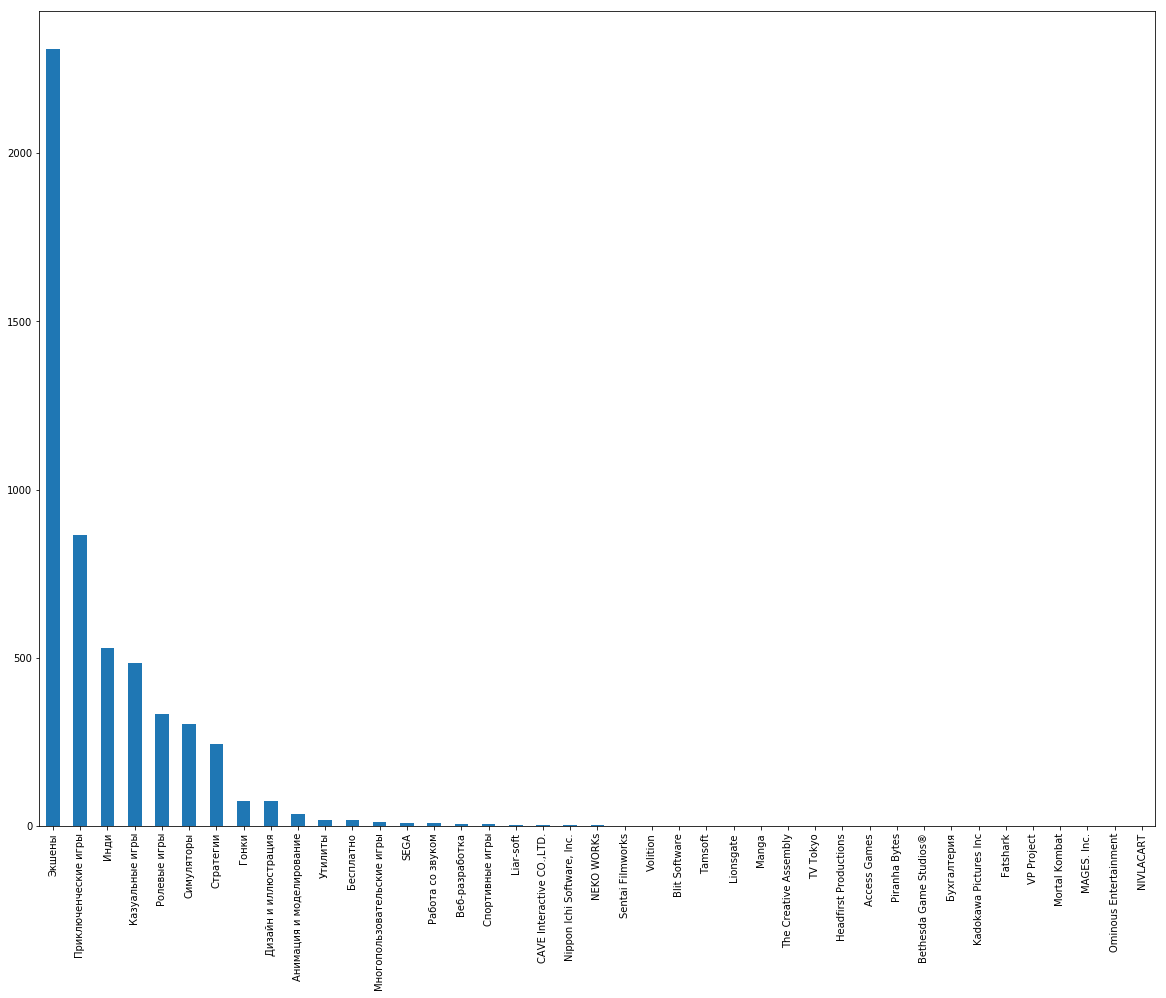

In [146]:
fig = plt.figure(figsize= (20,15))
df['жанр'].value_counts().plot.bar()
#очень много экшена, людям нравится экшен, значит будут покупать

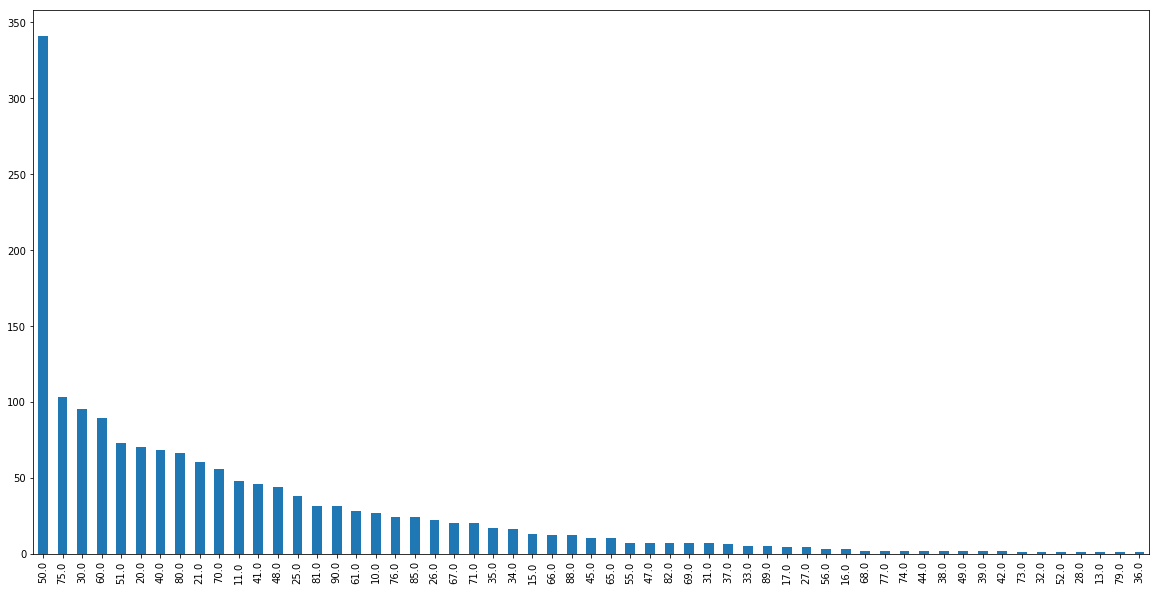

In [145]:
fig = plt.figure(figsize= (20,10))
df[df['скидка']!=0]['скидка'].value_counts().plot.bar()
#в основном скидка около 50%, но также видно и 75 и 30. 

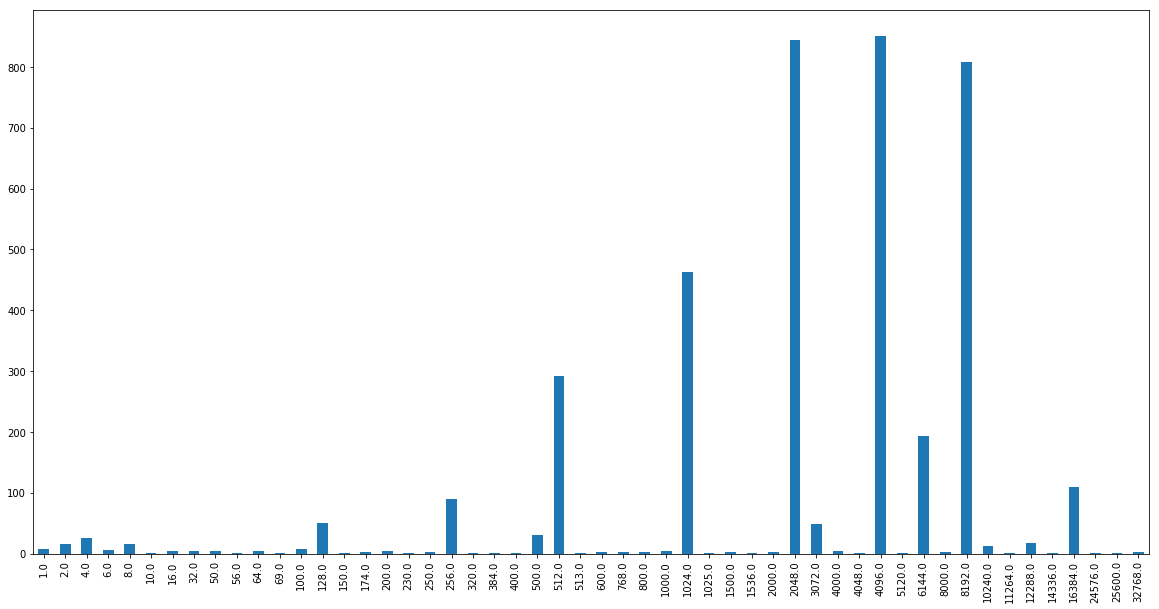

In [166]:
fig = plt.figure(figsize= (20,10))
df[df['Оперативная память']<100000]['Оперативная память'].value_counts().sort_index().plot.bar()
#тут видно, что памяти требуется 2^n. В основном 2,4,8 ГБ. на скидку никак не виляет

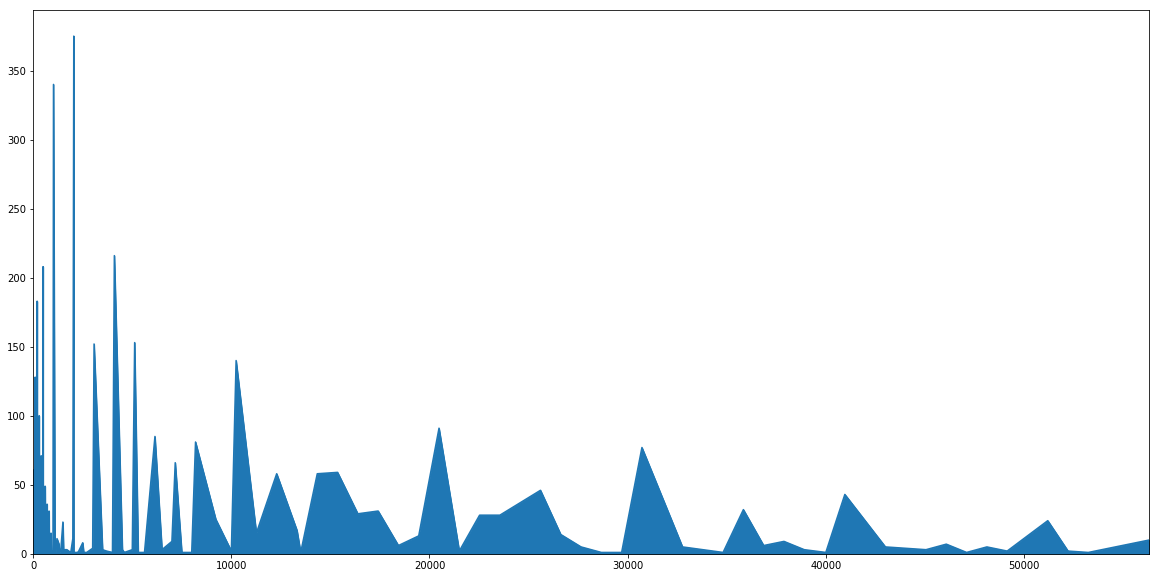

In [168]:
fig = plt.figure(figsize= (20,10))
df[df['Место на диске']<60000]['Место на диске'].value_counts().sort_index().plot.area()
#отсюда понятно, что в оснвном игр, которые много "весят" не так много. думаю на скидку не влияет 

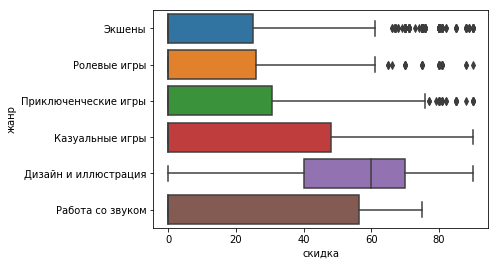

In [176]:
sns.boxplot(y="жанр", x="скидка", data=df[df['жанр'].isin(['Экшены', 'Ролевые игры',
         'Приключенческие игры',
       'Казуальные игры',
       'Дизайн и иллюстрация', 'Работа со звуком'])], orient="h")
#ноль информации из этого графика

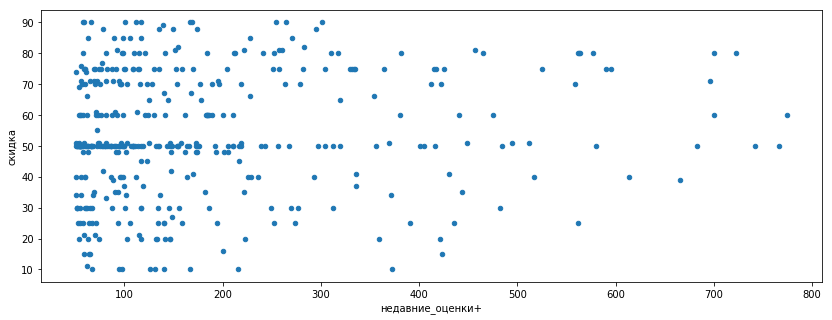

In [208]:
df[(df['недавние_оценки+']<800)& (df['недавние_оценки+']>50) & df['скидка']>0].plot.scatter(x='недавние_оценки+', y='скидка',figsize=(14,5)) 
#можно сделать предложение, что положительные оценки за последнюю неделю были сделаны из-за появления скидки, поэтому их немного.

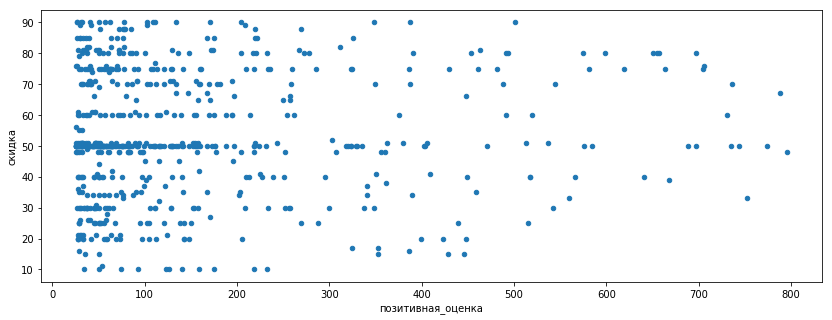

In [211]:
df[(df['позитивная_оценка']<800)& (df['позитивная_оценка']>25) & df['скидка']>0].plot.scatter(x='позитивная_оценка', y='скидка',figsize=(14,5)) 

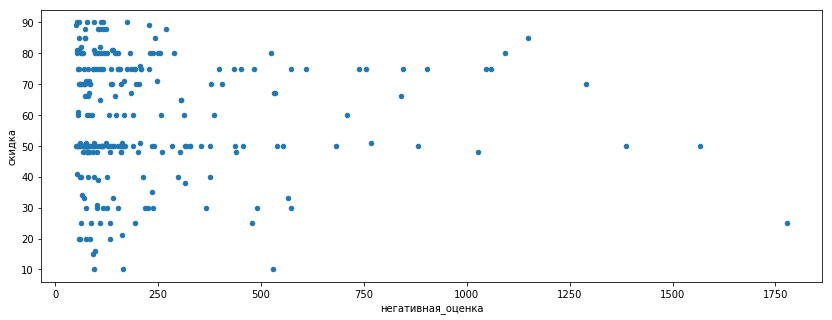

In [212]:
df[(df['негативная_оценка']<1800)& (df['негативная_оценка']>50) & df['скидка']>0].plot.scatter(x='негативная_оценка', y='скидка',figsize=(14,5))
#тут становится видно(слабо), что игры с плохими оценками начинают больше получать скидки от 50 и выше.

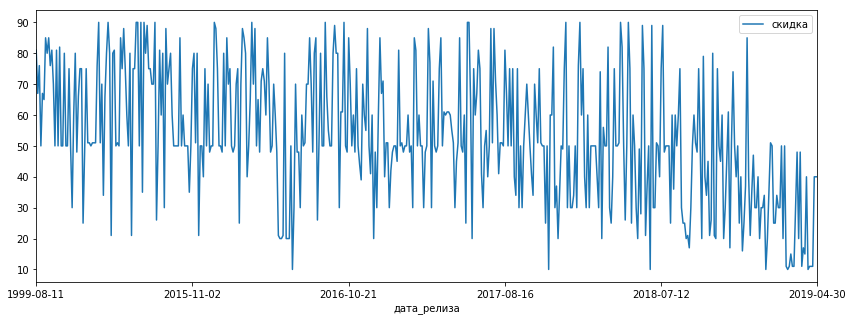

In [224]:
df[df['скидка']>0].sort_values(by='дата_релиза').dropna().plot(x='дата_релиза', y='скидка',figsize=(14,5))
#старые(относительно) игры чаще всего получают скидку 50+

In [222]:
#Далее идет проверка статистических гипотех

In [281]:
# проверим гипотезу: отличается ли размер скидки от жанра, возьмем два жанра 
action=df[(df['жанр']=='Экшены') & df['скидка']!=0]['скидка'].sample(200)
prikl=df[(df['жанр']=='Приключенческие игры') & df['скидка']!=0]['скидка'].sample(200)
t_stat1 = stats.ttest_ind(action,prikl)
t_stat1
#не отличается.

Ttest_indResult(statistic=-0.03838486013913796, pvalue=0.9694000778995335)

In [284]:
#посмотрим доверительный интервал для средних скидок двух жанров с точностью 99%
cm1 = sms.CompareMeans(sms.DescrStatsW(action), sms.DescrStatsW(prikl))
print (cm1.tconfint_diff(alpha=0.01))

(-5.474290135332709, 5.314290135332713)


In [283]:
#истинная средняя скидка игр с жанром экшен
t = sms.DescrStatsW(action)
t.tconfint_mean()
#что и следовало ожидать, в районе 50 %

(46.809802632309946, 52.60019736769005)

In [276]:
#а зависит ли от количества позитивных оценок
f1=df[(df['позитивная_оценка']>=100) & df['скидка']!=0]['скидка'].sample(300)
f2=df[(df['позитивная_оценка']<100) & df['скидка']!=0]['скидка'].sample(300)
t_stat2 = stats.ttest_ind(f1,f2)
t_stat2
#скидка больше там, где больше положительных оценок. Считаю это не очень логичным.

Ttest_indResult(statistic=2.7572563654174864, pvalue=0.006006886430898767)

In [277]:
#также сделаем доверительный интервал
cm2 = sms.CompareMeans(sms.DescrStatsW(f1), sms.DescrStatsW(f2))
print (cm2.tconfint_diff(alpha=0.01))

(0.2868279869333774, 8.846505346399962)


In [ ]:
#непараметрический критерий

In [285]:
#проверим гипотезу, что скидка игра с жанром приключения около 50
N_plus = len([x for x in prikl if x>50])
N_minus = len([x for x in prikl if x<50])
M = (N_plus - N_minus)/2
print(N_minus, N_plus, M)
# видно, что разница небольшая.

89 80 -4.5


In [290]:
#то же самое проверим критерием Уилкоксона
m0=50
prikl_for_test=prikl[25:75]
stats.wilcoxon(prikl_for_test - m0)
#не особо понятно как интерпретировать, но понятно что примерно 50 % скидон

WilcoxonResult(statistic=294.5, pvalue=0.030819374124104265)

In [299]:
#воспользуемся непараметрическим критерием Манна-Уитни для провери гипотезы о зависимости от количества позитивных оценок. 
f1=df[(df['позитивная_оценка']>=100) & df['скидка']!=0]['скидка'].sample(30)
f2=df[(df['позитивная_оценка']<100) & df['скидка']!=0]['скидка'].sample(30)
stats.mannwhitneyu(f1, f2, alternative = 'greater')
# 622 сильно больше критического значения, поэтому принимаем нулевую гипотезу. значит не зависит от оценки.

MannwhitneyuResult(statistic=622.0, pvalue=0.005454621407210744)

In [306]:
#посмотрим на корреляцю(Пирсона) конечной цены с другими 
df[['конечная_цена', 'скидка', 'Мультиплеер',
       'Одиночный', 'Кооператив', 'ММО', 'Англикий',
       'количество_языков', 'недавние_оценки+', 'все_оценки',
       'позитивная_оценка', 'негативная_оценка','Место на диске','Оперативная память',]].corr().head(2)
#можно сказать, что все очень плохо

,конечная_цена,скидка,Мультиплеер,Одиночный,Кооператив,ММО,Англикий,количество_языков,недавние_оценки+,все_оценки,позитивная_оценка,негативная_оценка,Место на диске,Оперативная память
конечная_цена,1.000000,-0.139231,0.041299,-0.083053,0.041814,0.057274,0.015640,0.087947,0.068815,0.079577,0.080254,0.058934,0.135992,0.008868
скидка,-0.139231,1.000000,-0.093043,-0.007067,-0.114417,-0.058797,-0.046503,-0.122912,-0.051498,-0.072059,-0.082598,-0.032859,-0.022106,0.000645


In [337]:
model = smf.ols('скидка ~ конечная_цена  * Мультиплеер * Одиночный * Кооператив * ММО*Англикий + \
np.exp(количество_языков)  + np.log(все_оценки)+\
np.log(позитивная_оценка+1)-np.log(негативная_оценка)',             data=df)
fitted = model.fit()
print (fitted.summary())
#предсказать скидку не получилось. нужно больше данных.

                            OLS Regression Results                            
Dep. Variable:                 скидка   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     17.75
Date:                Wed, 01 May 2019   Prob (F-statistic):          4.85e-107
Time:                        23:11:27   Log-Likelihood:                -24071.
No. Observations:                5249   AIC:                         4.822e+04
Df Residuals:                    5211   BIC:                         4.847e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [338]:
# тут нет временных рядов, поэтому я скачал с kaggle другой датасет(производство конфет) и на нем возьму предсказание временного ряда

In [441]:
data=pd.read_csv("candy_production.csv")
data.rename(columns={'IPG3113N':'Candy'},inplace=True)

In [454]:
data.index=pd.to_datetime(data.observation_date, format='%Y-%m')

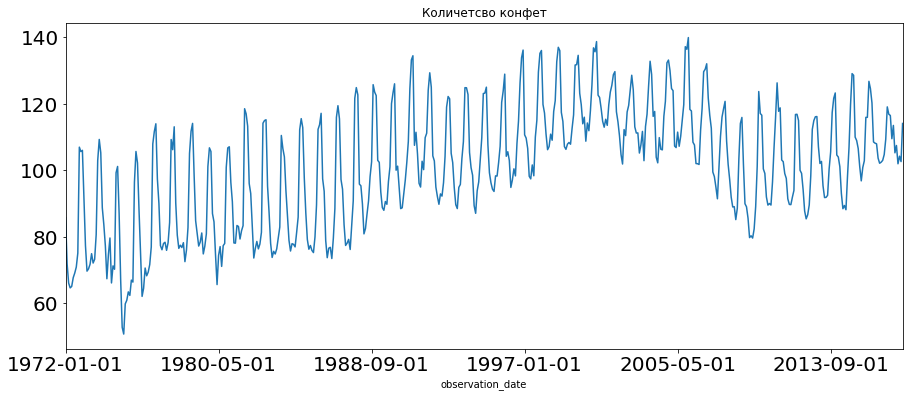

In [448]:
data.Candy.plot( figsize=(15,6),title= 'Количетсво конфет', fontsize=20)

In [456]:
rcParams['figure.figsize'] = 20, 10
data['year'] = data.index.year
data['month'] = data.index.month
data_pivot = pd.pivot_table(data, values = "Candy", columns = "year", index = "month")

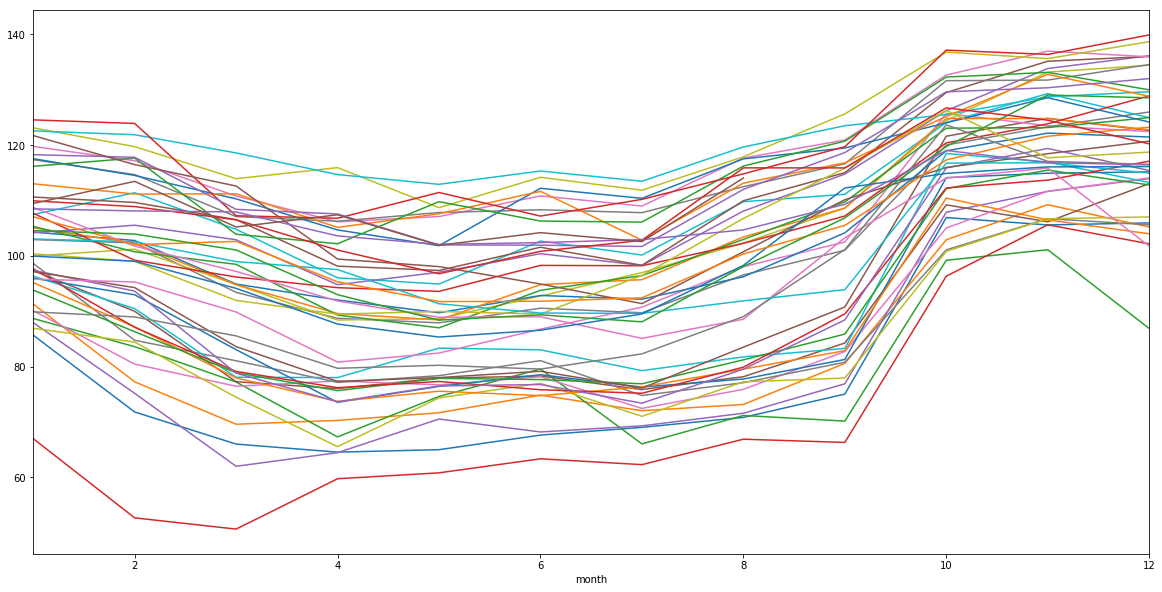

In [458]:
data_pivot.plot(legend=False)

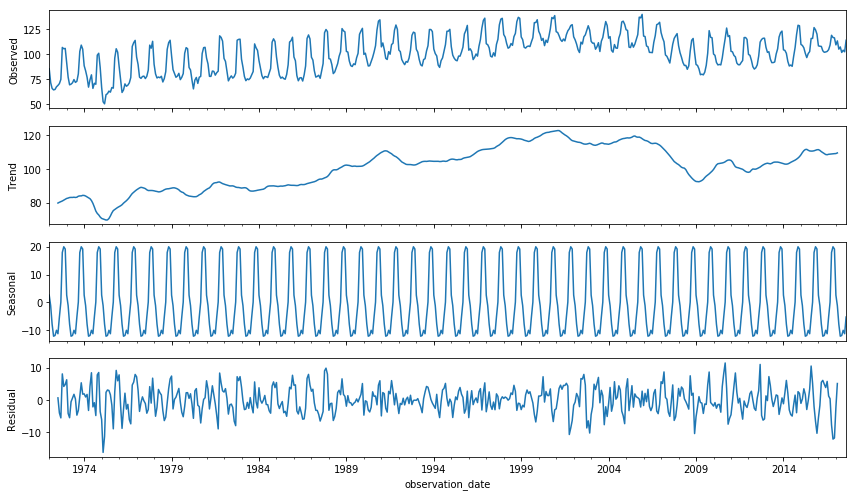

In [461]:
rcParams['figure.figsize'] = 12, 7
sm.tsa.seasonal_decompose(data.Candy).plot()
plt.show()

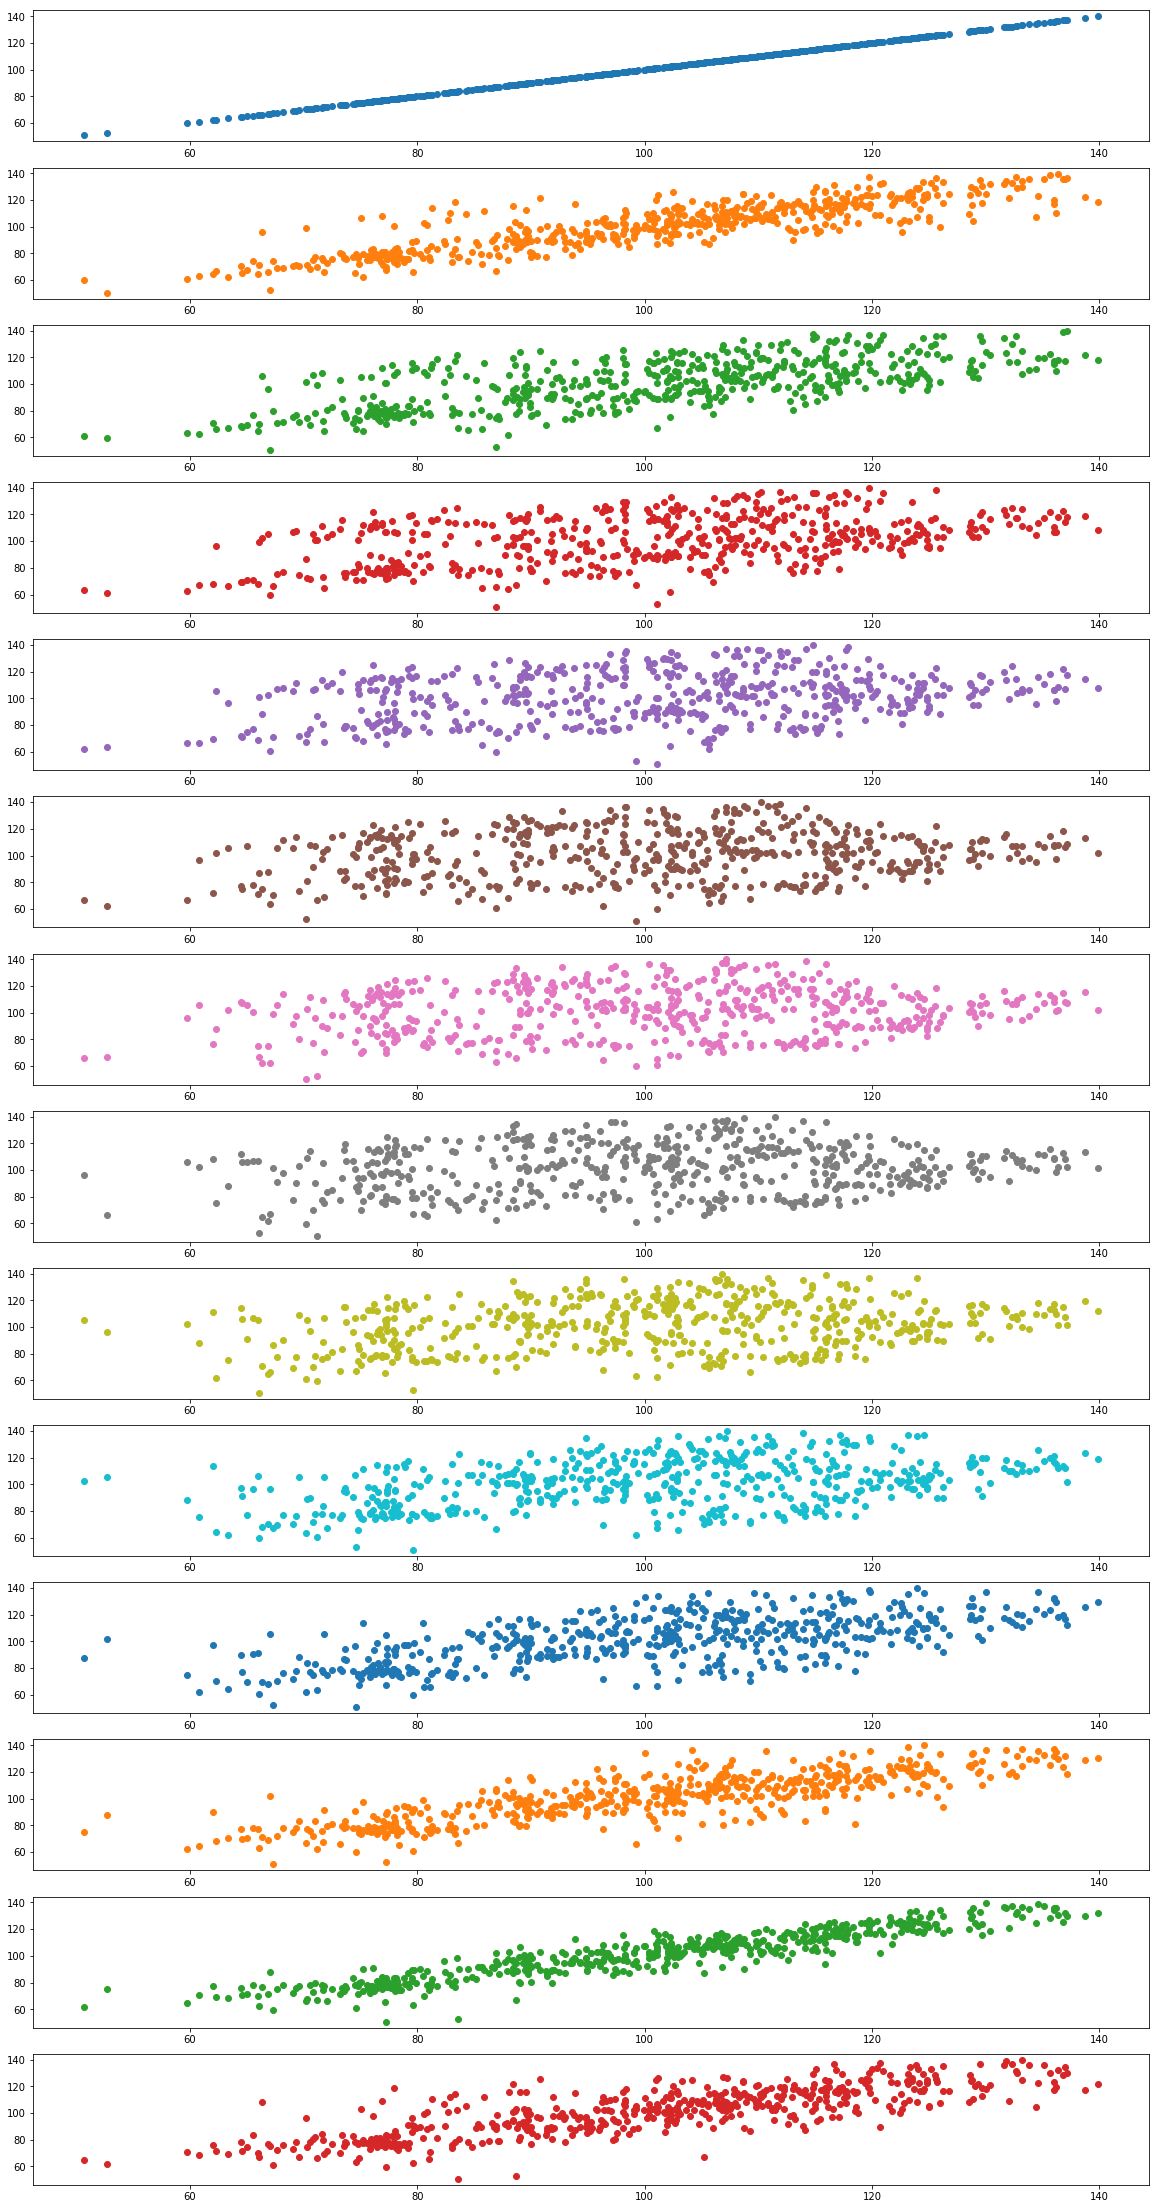

In [462]:
fig, axes = plt.subplots(14,1,figsize = (20,40))
for k, ax in enumerate(axes):
    for i in range(k):
        next(ax._get_lines.prop_cycler)
    ax.plot(data.Candy,data.Candy.shift(-k),'o')


plt.show()

In [466]:
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [475]:
data_copy=copy.deepcopy(data)

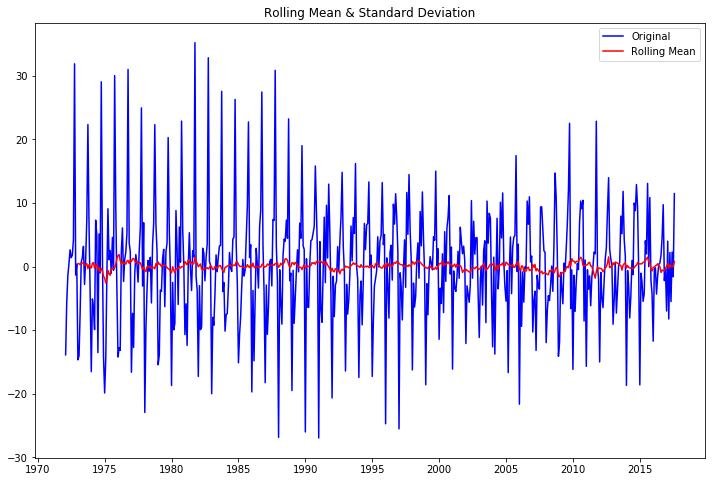

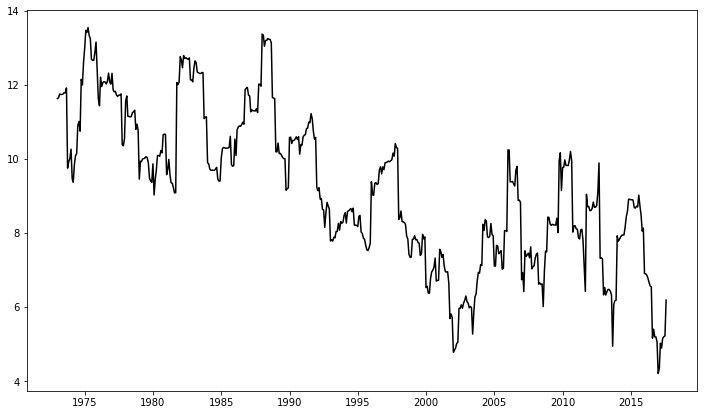

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.119512e+00
p-value                        8.925584e-08
#Lags Used                     1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64


In [476]:
rcParams['figure.figsize'] = 12, 7
data_copy['Candy_diff'] = data_copy.Candy - data_copy.Candy.shift(1)
data_copy.dropna(inplace = True)
test_stationarity(data_copy['Candy_diff'], window = 12)

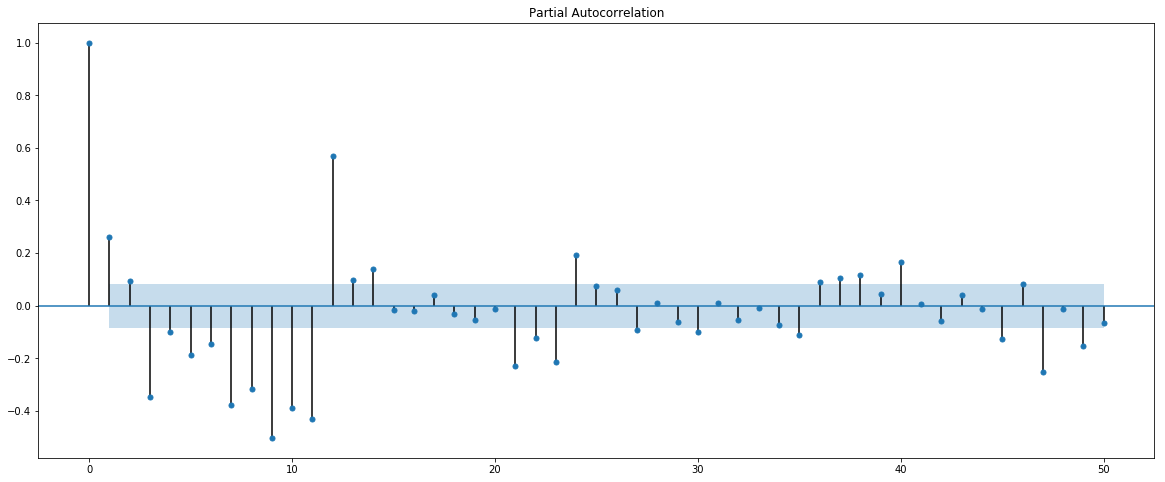

In [482]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(data_copy.Candy_diff.values, lags=50,ax = ax)
plt.show()

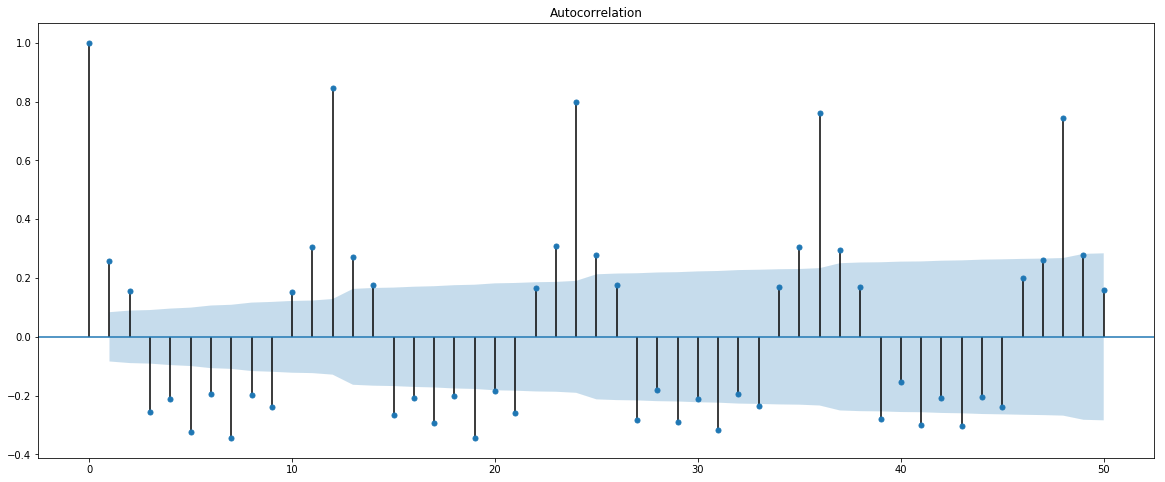

In [479]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(data_copy.Candy_diff.values, lags=50,ax = ax)
plt.show()

In [503]:
d = 1
D = 0
s = 12

ps = range(5, 10)
qs = range(0, 5)
Ps = range(0, 2)
Qs = range(0, 2)

In [504]:
from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [505]:
%%time
import warnings
global best_model
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data_copy.Candy, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

wrong parameters: (5, 2, 0, 0)
wrong parameters: (5, 2, 0, 1)
wrong parameters: (5, 2, 1, 0)
wrong parameters: (5, 2, 1, 1)
wrong parameters: (5, 3, 0, 0)
wrong parameters: (5, 3, 0, 1)
wrong parameters: (5, 3, 1, 0)
wrong parameters: (5, 3, 1, 1)
wrong parameters: (5, 4, 0, 0)
wrong parameters: (5, 4, 0, 1)
wrong parameters: (5, 4, 1, 0)
wrong parameters: (5, 4, 1, 1)
wrong parameters: (6, 3, 0, 0)
wrong parameters: (6, 3, 0, 1)
wrong parameters: (6, 3, 1, 0)
wrong parameters: (6, 3, 1, 1)
wrong parameters: (6, 4, 0, 0)
wrong parameters: (6, 4, 0, 1)
wrong parameters: (6, 4, 1, 0)
wrong parameters: (6, 4, 1, 1)
wrong parameters: (7, 3, 0, 0)
wrong parameters: (7, 3, 0, 1)
wrong parameters: (7, 3, 1, 0)
wrong parameters: (7, 3, 1, 1)
wrong parameters: (7, 4, 0, 0)
wrong parameters: (7, 4, 0, 1)
wrong parameters: (7, 4, 1, 0)
wrong parameters: (7, 4, 1, 1)
wrong parameters: (8, 3, 0, 0)
wrong parameters: (8, 3, 0, 1)
wrong parameters: (8, 3, 1, 0)
wrong parameters: (8, 3, 1, 1)
wrong pa

In [506]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Candy   No. Observations:                  547
Model:             SARIMAX(8, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1497.183
Date:                            Thu, 02 May 2019   AIC                           3020.366
Time:                                    14:28:34   BIC                           3076.300
Sample:                                02-01-1972   HQIC                          3042.231
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3037      0.064    -20.372      0.000      -1.429      -1.178
ar.L2         -1.2673      0.089   

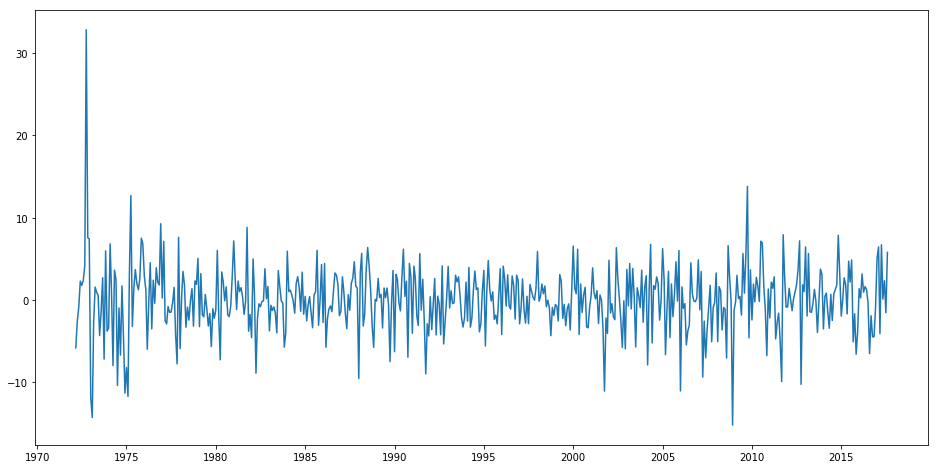

In [507]:
plt.figure(figsize=(16,8))
plt.plot(best_model.resid[1:])
plt.show()

In [508]:
stat_test = sm.tsa.adfuller(best_model.resid[:])
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -29.135986839942888
p-value:  0.0
Critical values:  {'1%': -3.442383534871275, '5%': -2.8668480382580386, '10%': -2.569597004924258}
единичных корней нет, ряд стационарен


In [509]:
forecast = best_model.predict(start = data_copy.shape[0], end = data_copy.shape[0]+36)

C:\Users\vkrin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


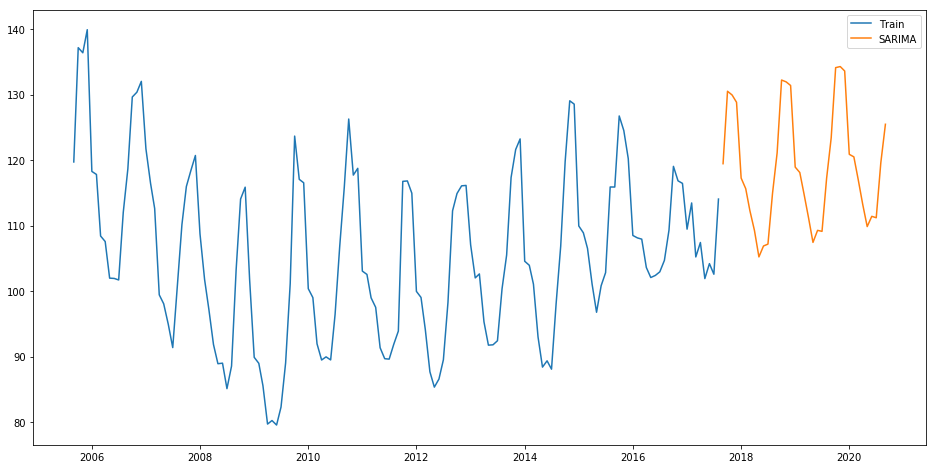

In [513]:
plt.figure(figsize=(16,8))
plt.plot(data_copy.Candy[-144:], label='Train')
plt.plot(forecast, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [514]:
#вот так подобрав параметры, смог предположить количество произведенных конфет в месяц на 3 года.

In [515]:
#Вывод: Попытался изучить размер скидки, выяснить зависит ли она от тех данных, что мы видим на сайте. Как оказалось, нет. 
#Скорее всего надо смотреть на количество продаж по месяцам, количество кликов на страницу,
#но, увы, такую информацию достать сложно